## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

review = pd.read_csv('data/reviewdata.csv')
review.head()

,name,date,Reviews,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Nessie Walker,10/10/2024,my dog recently passed away and i was able to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amy,10/09/2024,I received my cuddle clone of my poodle bichon...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Osa Thompson,10/08/2024,It was an absolutely beautiful and looked iden...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Greg Butler,10/08/2024,After my dog passed I had cuddle clones make ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Martina Ferraro,10/07/2024,This looks exactly like my beloved dog!!!! Ama...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataframe Info & EDA

In [2]:
review = review.iloc[:, :3]
review.head()

,name,date,Reviews
0,Nessie Walker,10/10/2024,my dog recently passed away and i was able to ...
1,Amy,10/09/2024,I received my cuddle clone of my poodle bichon...
2,Osa Thompson,10/08/2024,It was an absolutely beautiful and looked iden...
3,Greg Butler,10/08/2024,After my dog passed I had cuddle clones make ...
4,Martina Ferraro,10/07/2024,This looks exactly like my beloved dog!!!! Ama...


In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2102 non-null   object
 1   date     2105 non-null   object
 2   Reviews  2105 non-null   object
dtypes: object(3)
memory usage: 49.5+ KB


In [4]:
review.drop_duplicates()

,name,date,Reviews
0,Nessie Walker,10/10/2024,my dog recently passed away and i was able to ...
1,Amy,10/09/2024,I received my cuddle clone of my poodle bichon...
2,Osa Thompson,10/08/2024,It was an absolutely beautiful and looked iden...
3,Greg Butler,10/08/2024,After my dog passed I had cuddle clones make ...
4,Martina Ferraro,10/07/2024,This looks exactly like my beloved dog!!!! Ama...
...,...,...,...
2100,Piglet,04/23/2020,100
2101,Morgan,04/21/2020,I’m floored. My nerves have been through the r...
2102,Kendall,04/17/2020,Adopting Unk-our dog owner experience wasn't ...
2103,Sarah,04/15/2020,I was nervous as this was a gift for my parent...


### Explore Overall Review Distribution per Month

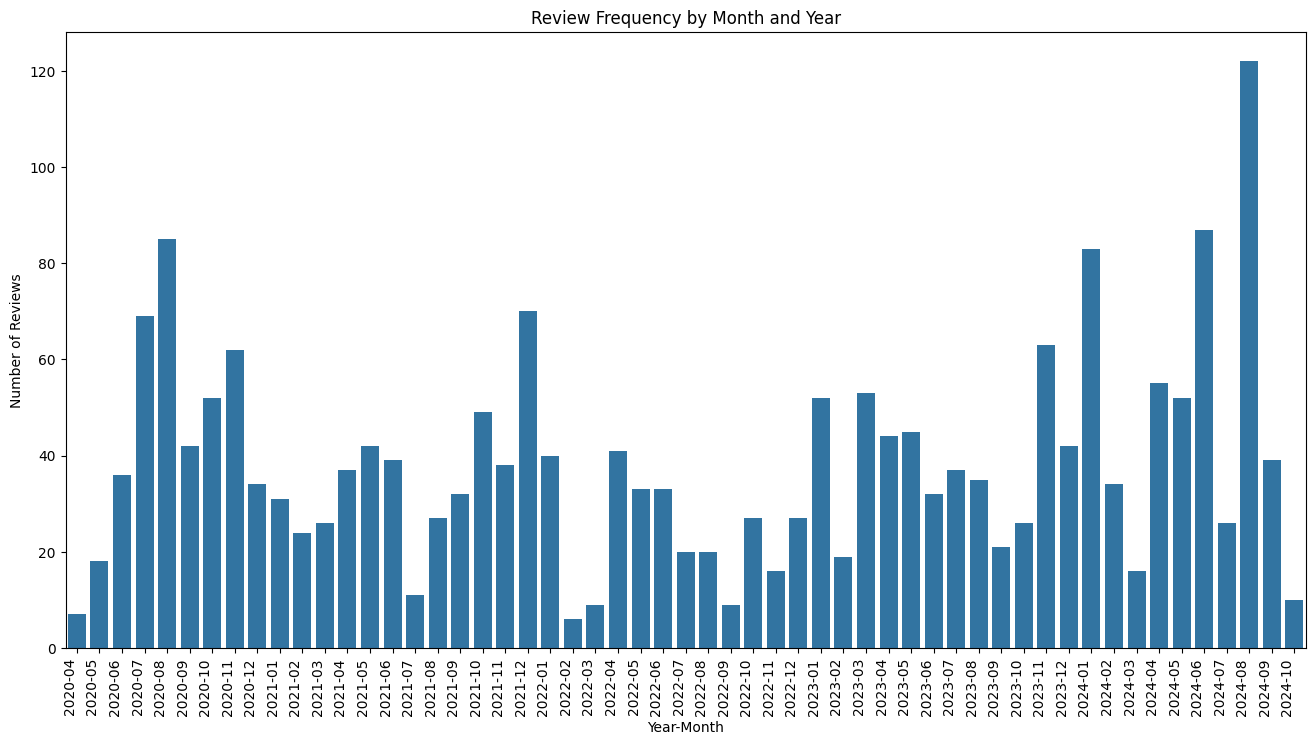

In [5]:
# Assuming your DataFrame is named 'review' and the date column is 'date'
review['date'] = pd.to_datetime(review['date'], format='%m/%d/%Y')  # Specify the date format

# # Extract month and year
review['ReviewMonthYear'] = review['date'].dt.strftime('%Y-%m')

# Extract year
review['ReviewYear'] = review['date'].dt.strftime('%Y')

review = review.sort_values(by='ReviewMonthYear', ascending=True)

# Create a bar chart using Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='ReviewMonthYear', y=review.groupby('ReviewMonthYear').transform('size'), data=review)
plt.title('Review Frequency by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')

# Adjust x-axis tick positions and rotation for better readability
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment as needed

plt.show()

- It seems like the review frequency goes up during the summer and winter but need further investigation
- There is a sudden spike in August 2024, make sure to take this into account when exploring seasonality

### Distribution by Year

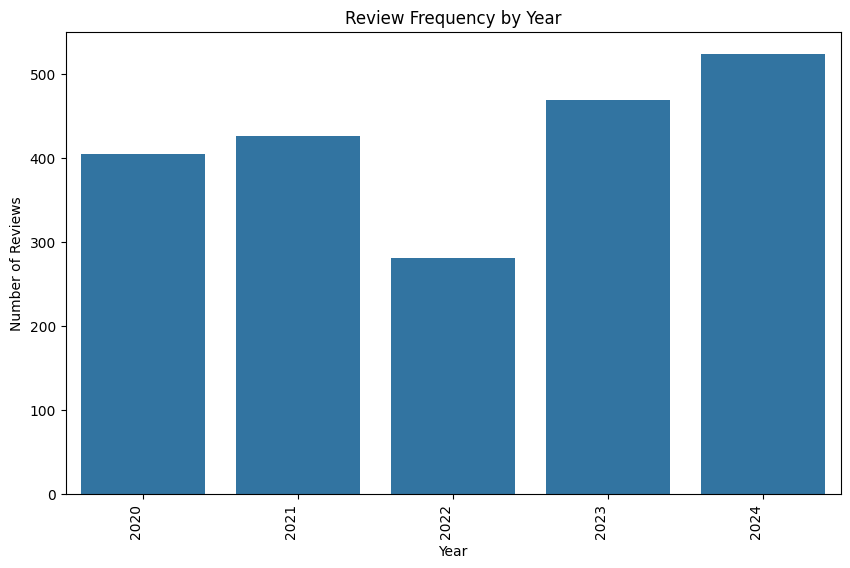

In [6]:
review = review.sort_values(by='ReviewYear')

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ReviewYear', y=review.groupby('ReviewYear').transform('size'), data=review)
plt.title('Review Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

# Adjust x-axis tick positions and rotation for better readability
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment as needed

plt.show()

- There is a sudden drop in year 2022
- other than the sudden drop in 2022, reviews frequency seems to steadily increase each year

### Distribution by Seasons

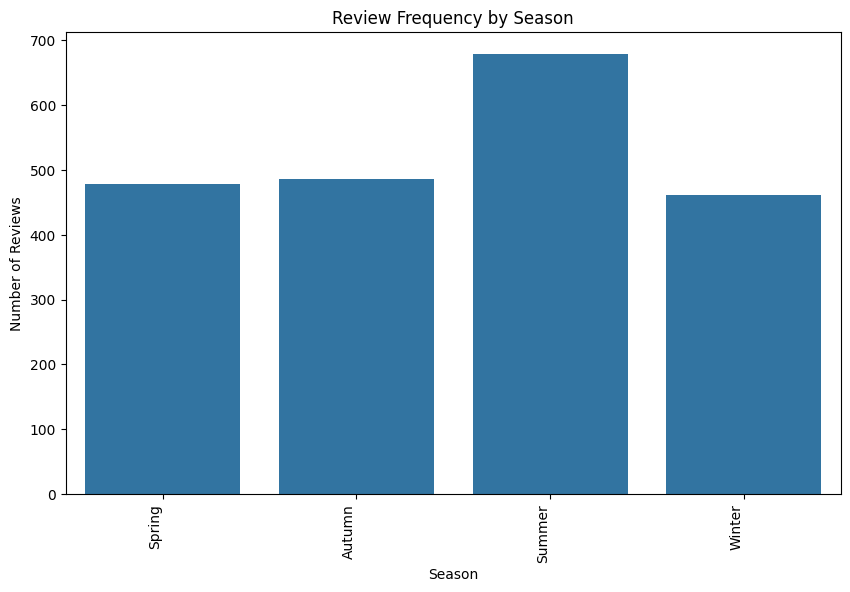

In [7]:
# Function to determine the season based on the month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    
review['Season'] = review['date'].dt.month.apply(lambda x: get_season(x))


# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y=review.groupby('Season').transform('size'), data=review)
plt.title('Review Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')

# Adjust x-axis tick positions and rotation for better readability
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment as needed

plt.show()

- reviews spiked in the summer (potentially because of the spike in August 2024)

In [8]:
review.head()

,name,date,Reviews,ReviewMonthYear,ReviewYear,Season
2104,Rebecca,2020-04-14,I wanted to give my Niece a special Christmas ...,2020-04,2020,Spring
1799,April,2020-10-30,"I lost both of my babies earlier this year, an...",2020-10,2020,Autumn
1800,Suzanne Bastian,2020-10-29,I to put my sweet boy Schultz down on October...,2020-10,2020,Autumn
1801,Elena,2020-10-29,"Love the idea, but didnt go through as well as...",2020-10,2020,Autumn
1802,Jodi,2020-10-29,Yesterday I received the Cuddle Clone that I ...,2020-10,2020,Autumn


/var/folders/pl/z33562990yl6lw1s6_v2b0rm0000gn/T/ipykernel_97573/2949576094.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_monthly = review.resample('M').sum()


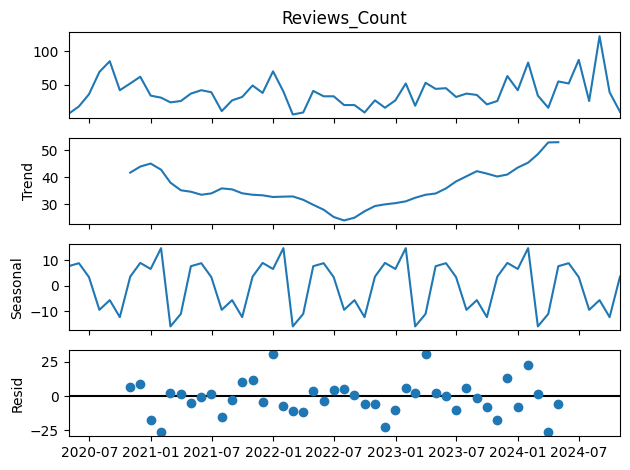

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

# Set 'date' as index and resample to monthly frequency
review.set_index('date', inplace=True)

# Create a new column 'Reviews_Count' with the review count
review['Reviews_Count'] = 1  # Assign 1 to each row

# Resample to monthly frequency and sum the review counts
reviews_monthly = review.resample('M').sum()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(reviews_monthly['Reviews_Count'], model='additive')

# Plot the decomposition
decomposition.plot()
plt.show()

- the middle dip of the Trend plot is caused by the fall in reviews in 2022 as we have explored from before
- there are periodic spikes indicating there might be a seasonality to be observed, however, due to the amount of potential outliers shown in the residual plot we cannot conclude that there must be a seasonality